## Data Visualization: Vietnam weather data Dataset

### Thu thập dữ liệu

 - Ngữ cảnh sử dụng bộ dataset này
    - Nghiên cứu khí hậu: Bộ dữ liệu này cung cấp thông tin về thời tiết trong suốt hơn 12 năm tại 40 tỉnh thành Việt Nam. Điều này cho phép nhà nghiên cứu và các nhà khoa học khí hậu phân tích và hiểu sâu về các xu hướng, biến đổi và mô hình hóa khí hậu trong khu vực này. Bạn có thể tìm hiểu về mô phỏng biến đổi khí hậu, hiệu ứng của biến đổi khí hậu lên các yếu tố khác nhau như nông nghiệp, môi trường, hay nguồn nước.

    - Dự báo thời tiết: Bộ dữ liệu này có thể được sử dụng để phát triển mô hình dự báo thời tiết. Bằng cách phân tích dữ liệu lịch sử và xây dựng mô hình dự báo, bạn có thể cung cấp dự báo thời tiết cho các tỉnh thành Việt Nam trong tương lai gần hoặc xa. Điều này hữu ích cho các công ty, tổ chức hoặc cá nhân quan tâm đến dự báo thời tiết để lập kế hoạch hoạt động, điều hành hoặc tối ưu hóa các hoạt động hàng ngày.

    - Phân tích địa lý: Với bộ dữ liệu này, bạn có thể nghiên cứu tương quan giữa khí hậu và địa lý. Bạn có thể phân tích tác động của vị trí địa lý, địa hình, hoặc các yếu tố tự nhiên khác đến thời tiết của một khu vực cụ thể. Điều này có thể hữu ích trong việc đánh giá tác động của sự biến đổi khí hậu lên một khu vực địa lý cụ thể hoặc hiểu rõ hơn về các đặc điểm địa lý ảnh hưởng đến khí hậu trong khu vực.

    - Ứng dụng công nghệ: Bộ dữ liệu thời tiết cũng có thể được sử dụng để phát triển các ứng dụng công nghệ liên quan đến thời tiết, chẳng hạn như các ứng dụng di động, trang web dự báo thời tiết, hoặc hệ thống cảnh báo thời tiết. Với thông tin chi tiết về thời tiết trong quá khứ, bạn có thể cải thiện tính chính xác của các ứng dụng này và cung cấp thông tin hữu ích cho người dùng.

    - Giáo dục và tìm hiểu: Bộ dữ liệu này cung cấp một nguồn tài liệu phong phú để giáo dục và tìm hiểu về khí hậu và thời tiết của Việt Nam. Sinh viên, học sinh, hoặc những người quan tâm có thể sử dụng nó để nghiên cứu, viết bài luận, hoặc đào sâu vào lĩnh vực này.

- Chủ đề và nguồn của bộ dữ liệu này: Bộ dữ liệu về thời tiết của Việt Nam từ ngày 1 tháng 1 năm 2009 đến ngày 18 tháng 6 năm 2021 cho 40 tỉnh thành. Bộ dữ liệu này được đăng lên Kaggle bởi **VĂN VIẾT HIẾU ANH** và được chia sẻ trên Kaggle cho mục đích học tập và nghiên cứu. 
- License: **CC0: Public Domain**
- Phương pháp thu thập: Quan sát 

### Import thư viện

In [1]:
# Pandas, Numpy dùng để xử lí các table và number
import pandas as pd
import numpy as np
# Matplotlib: dùng để trực quan hóa dữ liệu
# Seaborn: dùng để trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns
# plotly: dùng để trực quan hóa, tuy nhiên người dùng còn có thể tương tác trực tiếp với biểu đồ
import plotly.express as px
import plotly.graph_objects as go

from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

/home/ptnminh/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Đọc dữ liệu từ file csv

In [2]:
df = pd.read_csv("./weather.csv",encoding = "ISO-8859-1")

### Tiền xử lý dữ liệu 
#### In 5 dòng đầu tiên

In [3]:
df.head()

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010,2009-01-01
1,Bac Lieu,31,25,20,ENE,0.0,64,24,1010,2010-01-01
2,Bac Lieu,29,24,14,E,0.0,75,45,1008,2011-01-01
3,Bac Lieu,30,24,30,E,0.0,79,52,1012,2012-01-01
4,Bac Lieu,31,25,20,ENE,0.0,70,24,1010,2013-01-01


#### Thông tin số dòng và số cột

In [4]:
df.shape

(181960, 10)

#### Thông tin cột

In [5]:
df.columns

Index(['province', 'max', 'min', 'wind', 'wind_d', 'rain', 'humidi', 'cloud',
       'pressure', 'date'],
      dtype='object')

 - Cột `province` là các tỉnh thành
 - Cột `max` là nhiệt độ tối đa của ngày 
 - Cột `min` là nhiệt độ tối thiểu của ngày 
 - Cột `wind` là tốc độ gió (km/h) 
 - Cột `wind_d` là huống gió 
 - Cột `rain` là lượng mưa 
 - Cột `humidi` là % độ ẩm 
 - Cột `cloud` là % gió
 - Cột `pressure` là áp suất
 - Cột `date` là ngày thu thập dữ liệu

#### Kiểu dữ liệu của từng cột

In [6]:
df.dtypes

province     object
max           int64
min           int64
wind          int64
wind_d       object
rain        float64
humidi        int64
cloud         int64
pressure      int64
date         object
dtype: object

 - Dữ liệu của các cột `max`, `min`, `wind`, `humidi`, `cloud`, `pressure` là kiểu số nguyên 
 - Dữ liệu của các cột `rain` là kiểu số thực 
 - Các dữ liệu ở các cột còn lại thuộc kiểu non-numeric

#### Số giá trị null của từng cột

In [7]:
df.isnull().sum()

province    0
max         0
min         0
wind        0
wind_d      0
rain        0
humidi      0
cloud       0
pressure    0
date        0
dtype: int64

Ta thấy không có giá trị null trong dataframe

### Chuyển về kiểu dữ liệu datetime

Áp dụng cho cột `date` 

In [8]:
df["date"] = pd.to_datetime(df["date"])


Kiểu tra kiểu dữ liệu

In [9]:
df.dtypes

province            object
max                  int64
min                  int64
wind                 int64
wind_d              object
rain               float64
humidi               int64
cloud                int64
pressure             int64
date        datetime64[ns]
dtype: object

Cách trích xuất thông tin từ dữ liệu datetime

In [10]:
df['date'].dt.day

0          1
1          1
2          1
3          1
4          1
          ..
181955    28
181956    28
181957    28
181958    28
181959    28
Name: date, Length: 181960, dtype: int32

#### Kiểm tra các dòng bị trùng lặp

In [11]:
df.duplicated().sum()

0

Không có dòng nào mà dữ liệu bị lặp

In [12]:
df.head()

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010,2009-01-01
1,Bac Lieu,31,25,20,ENE,0.0,64,24,1010,2010-01-01
2,Bac Lieu,29,24,14,E,0.0,75,45,1008,2011-01-01
3,Bac Lieu,30,24,30,E,0.0,79,52,1012,2012-01-01
4,Bac Lieu,31,25,20,ENE,0.0,70,24,1010,2013-01-01


#### Kiểm tra các giá trị bị sai

In ra các giá trị có trong `province`

In [13]:
df['province'].unique()

array(['Bac Lieu', 'Ho Chi Minh City', 'Tam Ky', 'Ben Tre', 'Hoa Binh',
       'Tan An', 'Bien Hoa', 'Hong Gai', 'Thai Nguyen', 'Buon Me Thuot',
       'Hue', 'Thanh Hoa', 'Ca Mau', 'Long Xuyen', 'Tra Vinh', 'Cam Pha',
       'My Tho', 'Tuy Hoa', 'Cam Ranh', 'Nam Dinh', 'Uong Bi', 'Can Tho',
       'Nha Trang', 'Viet Tri', 'Chau Doc', 'Phan Rang', 'Vinh', 'Da Lat',
       'Phan Thiet', 'Vinh Long', 'Ha Noi', 'Play Cu', 'Vung Tau',
       'Hai Duong', 'Qui Nhon', 'Yen Bai', 'Hai Phong', 'Rach Gia',
       'Hanoi', 'Soc Trang'], dtype=object)

Nhận thấy có 2 giá trị trùng nhau là `Ha Noi` và `Hanoi`

Thực hiện đếm số giá trị có trong 2 dữ liệu trên

In [14]:
df[df['province'] == 'Hanoi'].count()

province    4549
max         4549
min         4549
wind        4549
wind_d      4549
rain        4549
humidi      4549
cloud       4549
pressure    4549
date        4549
dtype: int64

In [15]:
df[df['province'] == 'Ha Noi'].count()

province    4549
max         4549
min         4549
wind        4549
wind_d      4549
rain        4549
humidi      4549
cloud       4549
pressure    4549
date        4549
dtype: int64

Kiểm tra sự tương đồng giữa 2 tập dữ liệu

In [16]:
df[df['province'] == 'Hanoi'].reset_index() == df[df['province'] == 'Ha Noi'].reset_index()

,index,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date
0,False,False,True,True,True,True,True,True,True,True,True
1,False,False,True,True,True,True,True,True,True,True,True
2,False,False,True,True,True,True,True,True,True,True,True
3,False,False,True,True,True,True,True,True,True,True,True
4,False,False,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
4544,False,False,False,False,False,False,False,False,False,False,False
4545,False,False,False,False,True,False,False,False,False,False,False
4546,False,False,False,False,False,False,False,False,False,False,False
4547,False,False,False,False,False,True,False,False,False,False,False


Nhận thấy có một số sự khác nhau nhất định khi gần về cuối dataframe. Để cho rõ ràng, ta sẽ loại bỏ 1 trong 2 dữ liệu.

Thực hiện loại bỏ dữ liệu có giá trị `province` là `Hanoi`

In [17]:
df = df[df['province'] != 'Hanoi']

Kiểm lại tra giá trị 

In [18]:
df[df['province'] == 'Hanoi'].count()

province    0
max         0
min         0
wind        0
wind_d      0
rain        0
humidi      0
cloud       0
pressure    0
date        0
dtype: int64

#### Mô tả dữ liệu

Tìm hiểu các cột có dữ liệu numerical

In [19]:
df.describe()

,max,min,wind,rain,humidi,cloud,pressure,date
count,177411.000000,177411.000000,177411.000000,177411.000000,177411.000000,177411.000000,177411.000000,177411
mean,29.846182,23.317788,11.106763,6.628414,77.156828,41.498515,1010.203933,2015-03-26 06:37:35.440755968
min,4.000000,2.000000,1.000000,0.000000,23.000000,0.000000,988.000000,2009-01-01 00:00:00
25%,28.000000,22.000000,7.000000,0.100000,72.000000,23.000000,1008.000000,2012-02-12 00:00:00
50%,31.000000,24.000000,10.000000,1.800000,78.000000,38.000000,1010.000000,2015-03-26 00:00:00
75%,33.000000,26.000000,14.000000,7.600000,84.000000,58.000000,1012.000000,2018-05-07 00:00:00
max,46.000000,32.000000,54.000000,596.400000,100.000000,100.000000,1038.000000,2021-06-18 00:00:00
std,4.520925,3.909337,5.337878,13.695427,9.231037,23.771310,4.560205,NaN


 - Nhiệt độ tối đa đạt được là gần 30 độ 
 - Nhiệt độ tối thiểu đạt được là 23 độ 
 - Tốc độ gió trung bình là 11km/h 
 

Tìm hiểu các cột có dữ liệu categorical

In [20]:
cat_features = [f for f in df.columns if(df[f].dtype=='O')]
tmp = df[cat_features].describe()

tmp

,province,wind_d
count,177411,177411
unique,39,16
top,Bac Lieu,ESE
freq,4549,20818


In [21]:
print('Percent of Bac Lieu of total province: ' + str(tmp.loc['freq', 'province'] * 100 / tmp.loc['count', 'province']))
print('Percent of ESE of total total province: ' + str(tmp.loc['freq', 'wind_d'] * 100 / tmp.loc['count', 'wind_d']))


Percent of Bac Lieu of total province: 2.5641025641025643
Percent of ESE of total total province: 11.734334398656229


### Khám phá mối quan hệ trong dữ liệu

**Câu hỏi 1**: Lượng mưa trung bình của các tỉnh thành là bao nhiêu?
 
**Câu hỏi 2**: Mối quan hệ giữa hướng gió và lượng mưa?

**Câu hỏi 3**: Mức độ tập trung mưa theo từng tháng và từng tỉnh thành

**Câu hỏi 4**: Mối quan hệ giữa tháng, hướng gió và mức độ mưa của các tỉnh thành mưa nhiều nhất?

**Câu hỏi 5**: Độ ẩm trung bình của top 5 tỉnh thành có lượng mưa trung bình lớn nhất

**Câu hỏi 6**: Nhiệt độ trung bình trong năm của top 5 tỉnh thành có lượng mưa ít nhất

##### Câu hỏi 1

Để trực quan hóa lượng mưa trung bình của các tỉnh thành, chúng ta có thể sử dụng một biểu đồ cột (bar chart) để so sánh giá trị trung bình của từng tỉnh thành. Biểu đồ cột là một lựa chọn phù hợp trong trường hợp này vì nó giúp chúng ta so sánh dễ dàng giữa các giá trị và hiển thị sự khác biệt rõ ràng giữa các tỉnh thành.

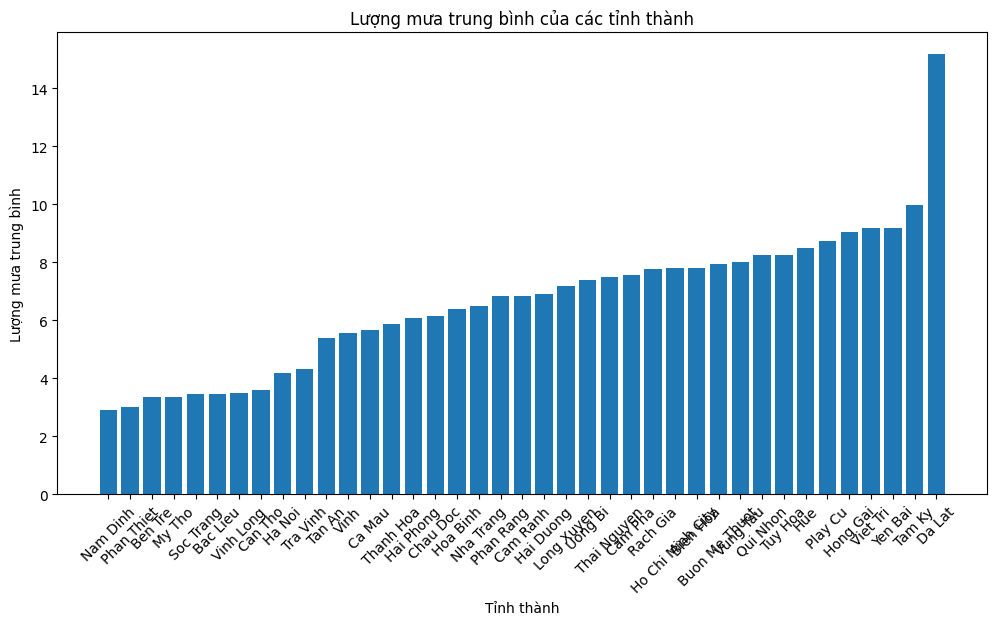

In [22]:


# Tính lượng mưa trung bình của từng tỉnh thành
mean_rain_by_province = df.groupby('province')['rain'].mean().sort_values()

# Tạo biểu đồ cột
plt.figure(figsize=(12, 6))
plt.bar(mean_rain_by_province.index, mean_rain_by_province.values)
plt.xlabel('Tỉnh thành')
plt.ylabel('Lượng mưa trung bình')
plt.title('Lượng mưa trung bình của các tỉnh thành')
plt.xticks(rotation=45)
plt.show()


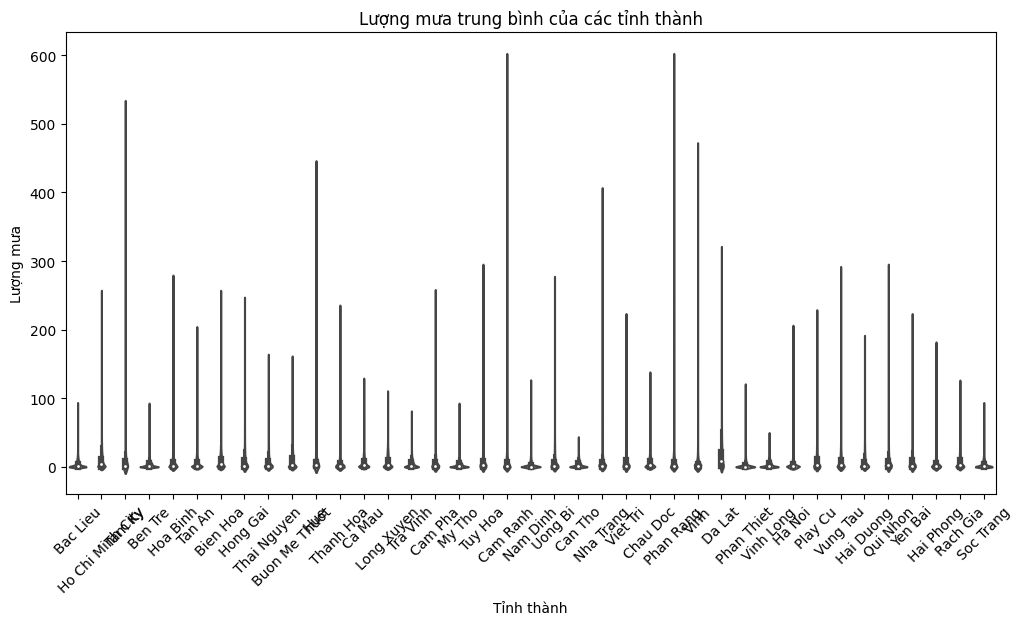

In [23]:
# Tạo biểu đồ violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x=df['province'], y=df['rain'])
plt.xlabel('Tỉnh thành')
plt.ylabel('Lượng mưa')
plt.title('Lượng mưa trung bình của các tỉnh thành')
plt.xticks(rotation=45)
plt.show()

Biểu đồ cho thấy phân phối xác suất của lượng mưa trung bình trong từng tỉnh thành.
Các violin plot đối xứng hoặc không đối xứng tạo ra thông tin về biến đổi của lượng mưa trung bình.
Chúng ta có thể so sánh các violin plot để xác định sự khác biệt về phân phối và lượng mưa trung bình giữa các tỉnh thành.
Với biểu đồ violin plot, chúng ta có thể khám phá sự biến đổi và phân phối của lượng mưa trung bình trong các tỉnh thành một cách chi tiết hơn. Điều này giúp chúng ta hiểu rõ hơn về tính đa dạng và đặc trưng của dữ liệu mưa trên địa bàn.

##### Câu hỏi 2

Để xem xét mối quan hệ giữa hướng gió và lượng mưa, chúng ta có thể sử dụng biểu đồ boxplot. Biểu đồ boxplot sẽ cho phép chúng ta so sánh phân phối của lượng mưa dựa trên từng hướng gió và xác định có sự khác biệt đáng kể hay không.

Dưới đây là một ví dụ về cách trực quan hóa mối quan hệ giữa hướng gió và lượng mưa bằng biểu đồ boxplot:

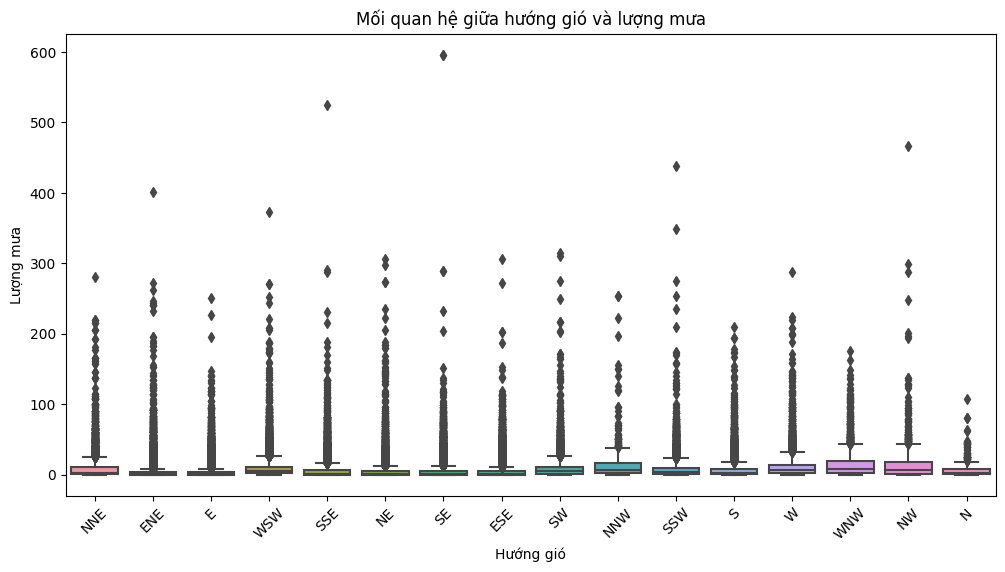

In [24]:
 
# Tạo biểu đồ boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['wind_d'], y=df['rain'])
plt.xlabel('Hướng gió')
plt.ylabel('Lượng mưa')
plt.title('Mối quan hệ giữa hướng gió và lượng mưa')
plt.xticks(rotation=45)
plt.show()


Trong biểu đồ boxplot trên, trục x đại diện cho các hướng gió và trục y đại diện cho lượng mưa. Mỗi hộp biểu diễn phạm vi giữa mức 25% và mức 75% của lượng mưa trong từng hướng gió, và đường kẻ ngang trong hộp biểu diễn giá trị trung vị (median). Các điểm ngoại lai được biểu diễn bằng các chấm nằm ngoài phạm vi hộp.

Kết luận:

Dựa vào biểu đồ boxplot, chúng ta có thể rút ra các kết luận như sau:

Biểu đồ cho thấy sự phân bố của lượng mưa dựa trên từng hướng gió.
Nếu các hộp có mức 25% và mức 75% gần nhau và đường kẻ ngang trong hộp gần giữa hộp, chúng ta có thể kết luận rằng không có sự khác biệt đáng kể về lượng mưa giữa các hướng gió.
Nếu các hộp có mức 25% và mức 75% xa nhau và đường kẻ ngang trong hộp không gần giữa hộp, chúng ta có thể kết luận rằng có sự khác biệt đáng kể về lượng mưa giữa các hướng gió.
Với biểu đồ boxplot, chúng ta có thể trực quan hóa mối quan hệ giữa hướng gió và lượng mưa, từ đó hiểu được sự biến đổi và sự khác biệt trong lượng mưa dựa trên hướng gió.

##### Câu hỏi 3

Biểu đồ heatmap sẽ hiển thị mức độ tập trung mưa theo từng tháng và từng tỉnh thành bằng màu sắc. Màu sáng thể hiện mức tập trung cao hơn và màu tối thể hiện mức tập trung thấp hơn.

Dưới đây là một ví dụ về cách sử dụng biểu đồ heatmap để trực quan hóa tập trung mưa vào tháng nào trong năm của các tỉnh thành:

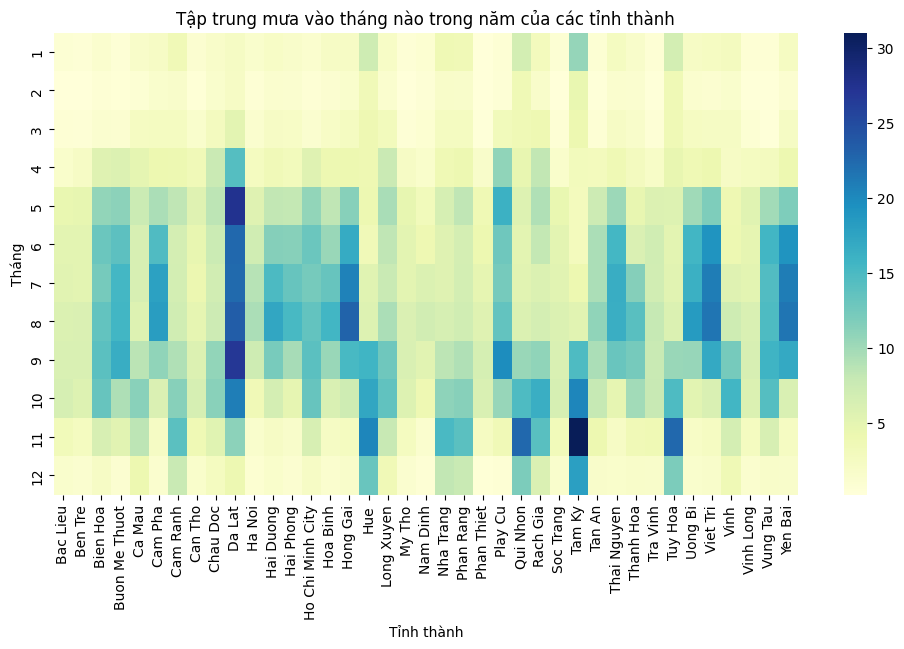

In [25]:
import numpy as np


# Tạo pivot table với giá trị là lượng mưa và hàng cột lần lượt là tháng và tỉnh thành
pivot_table = df.pivot_table(values='rain', index=df['date'].dt.month, columns='province', aggfunc=np.mean)

# Tạo biểu đồ heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.xlabel('Tỉnh thành')
plt.ylabel('Tháng')
plt.title('Tập trung mưa vào tháng nào trong năm của các tỉnh thành')
plt.show()


Kết luận:

Dựa vào biểu đồ heatmap, chúng ta có thể rút ra các kết luận như sau:

Biểu đồ cho thấy mức độ tập trung mưa vào từng tháng trong năm của các tỉnh thành.
Các ô có màu sáng thể hiện mức tập trung mưa cao hơn trong tháng đó và tỉnh thành đó.
Bằng cách so sánh màu sắc của các ô, chúng ta có thể xác định được tháng nào trong năm tập trung mưa nhiều nhất và tháng nào tập trung mưa ít hơn, cũng như các sự khác biệt giữa các tỉnh thành.
Với biểu đồ heatmap, chúng ta có thể trực quan hóa mức độ tập trung mưa vào từng tháng trong năm của các tỉnh thành một cách độc đáo và dễ hiểu.

##### Câu hỏi 4

Để trực quan hóa mối quan hệ giữa tháng, hướng gió và mức độ mưa của các tỉnh thành mưa nhiều nhất, chúng ta có thể sử dụng biểu đồ 3D

Dưới đây là một ví dụ về cách sử dụng biểu đồ 3D (scatter plot) để trực quan hóa mối quan hệ giữa tháng, hướng gió và mức độ mưa của các tỉnh thành mưa nhiều nhất:

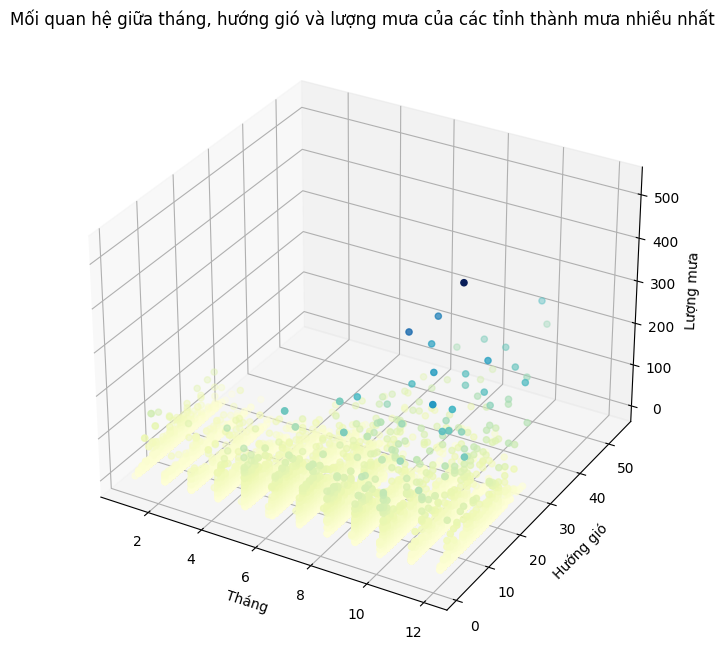

In [26]:
from mpl_toolkits.mplot3d import Axes3D


# Lọc dữ liệu cho các tỉnh thành mưa nhiều nhất
top_rainy_provinces = df.groupby('province')['rain'].sum().nlargest(5).index
top_rainy_data = df[df['province'].isin(top_rainy_provinces)]

# Tạo biểu đồ 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(top_rainy_data['date'].dt.month, top_rainy_data['wind'], top_rainy_data['rain'], c=top_rainy_data['rain'], cmap='YlGnBu')

# Đặt tên cho các trục
ax.set_xlabel('Tháng')
ax.set_ylabel('Hướng gió')
ax.set_zlabel('Lượng mưa')

# Đặt tiêu đề cho biểu đồ
plt.title('Mối quan hệ giữa tháng, hướng gió và lượng mưa của các tỉnh thành mưa nhiều nhất')

# Hiển thị biểu đồ
plt.show()


##### Câu hỏi 5

Để trực quan hóa độ ẩm trung bình của top 5 tỉnh thành có lượng mưa trung bình lớn nhất, chúng ta có thể sử dụng biểu đồ hình tròn (pie chart).

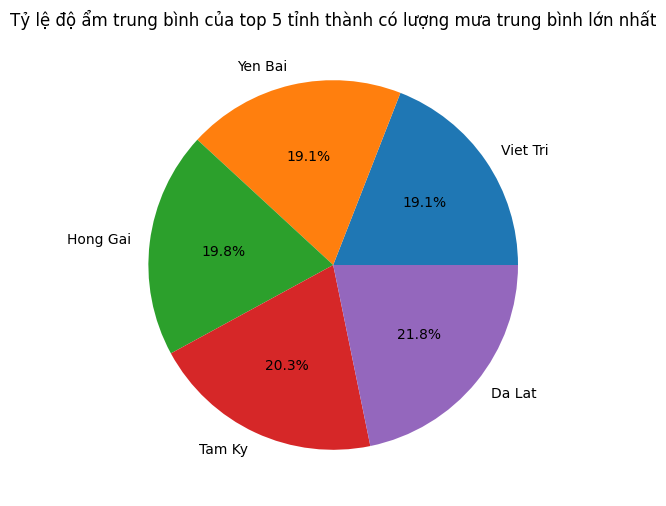

In [27]:

# Lọc dữ liệu cho top 5 tỉnh thành có lượng mưa trung bình lớn nhất
top_rainy_provinces = df.groupby('province')['rain'].mean().nlargest(5).index
top_rainy_data = df[df['province'].isin(top_rainy_provinces)]

# Tính độ ẩm trung bình của từng tỉnh thành
mean_humidity_by_province = top_rainy_data.groupby('province')['humidi'].mean().sort_values()

# Tạo biểu đồ pie chart
plt.figure(figsize=(6, 6))
plt.pie(mean_humidity_by_province.values, labels=mean_humidity_by_province.index, autopct='%1.1f%%')
plt.title('Tỷ lệ độ ẩm trung bình của top 5 tỉnh thành có lượng mưa trung bình lớn nhất')
plt.show()


Kết luận:

Dựa vào biểu đồ cột hoặc biểu đồ hình tròn, chúng ta có thể rút ra các kết luận như sau:

Biểu đồ cho thấy độ ẩm trung bình của top 5 tỉnh thành có lượng mưa trung bình lớn nhất.
Biểu đồ cột cho phép chúng ta so sánh độ ẩm trung bình giữa các tỉnh thành một cách dễ dàng.
Biểu đồ hình tròn cho thấy tỷ lệ độ ẩm trung bình của từng tỉnh thành trong top 5.
Chúng ta có thể nhận thấy tỷ lệ độ ẩm trung bình của các tỉnh thành trong top 5 và so sánh chúng với nhau.
Với biểu đồ cột hoặc biểu đồ hình tròn, chúng ta có thể trực quan hóa và so sánh độ ẩm trung bình của top 5 tỉnh thành có lượng mưa trung bình lớn nhất. Điều này giúp chúng ta nhìn thấy sự khác biệt và đặc điểm của các tỉnh thành trong việc độ ẩm trung bình.

##### Câu hỏi 6

Để trực quan hóa nhiệt độ trung bình trong năm của top 5 tỉnh thành có lượng mưa ít nhất, chúng ta có thể sử dụng biểu đồ radar (radar chart).

Biểu đồ radar sẽ tạo ra một hình ảnh đặc biệt với các đường cong kết nối các điểm dữ liệu, giúp chúng ta so sánh nhiệt độ trung bình trong năm của các tỉnh thành một cách rõ ràng.

Dưới đây là một ví dụ về cách sử dụng biểu đồ radar để trực quan hóa nhiệt độ trung bình trong năm của top 5 tỉnh thành có lượng mưa ít nhất:

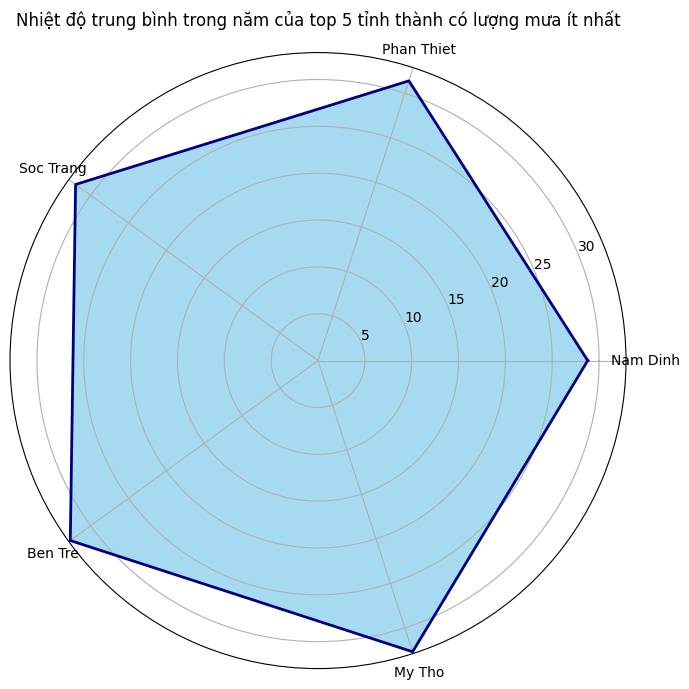

In [28]:

# Lọc dữ liệu cho top 5 tỉnh thành có lượng mưa ít nhất
low_rainy_provinces = df.groupby('province')['rain'].mean().nsmallest(5).index
low_rainy_data = df[df['province'].isin(low_rainy_provinces)]

# Tính nhiệt độ trung bình trong năm của từng tỉnh thành
mean_temperature_by_province = low_rainy_data.groupby('province')['max'].mean().sort_values()

# Tạo biểu đồ radar
categories = mean_temperature_by_province.index
values = mean_temperature_by_province.values
N = len(categories)

values = np.concatenate((values,[values[0]]))  # Đảm bảo vẽ đường đóng vòng
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.fill(angles, values, color='skyblue', alpha=0.75)
ax.plot(angles, values, color='navy', linewidth=2)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title('Nhiệt độ trung bình trong năm của top 5 tỉnh thành có lượng mưa ít nhất', pad=20)
ax.grid(True)

plt.show()


Kết luận:

Dựa vào biểu đồ radar, chúng ta có thể rút ra các kết luận như sau:

Biểu đồ radar tạo ra các đường cong kết nối các điểm dữ liệu.
Chúng ta có thể so sánh nhiệt độ trung bình trong năm của các tỉnh thành một cách rõ ràng.
Biểu đồ radar giúp chúng ta nhìn thấy sự khác biệt và đặc điểm của các tỉnh thành trong việc nhiệt độ trung bình.
Chúng ta có thể xác định các tỉnh thành có nhiệt độ trung bình cao nhất và thấp nhất trong top 5 tỉnh thành có lượng mưa ít nhất.

### Phân tích và chọn mô hình phù hợp

Thêm cột `avg_temp` vào data bằng cách lấy trung bình của cột `max` (nhiệt độ có giá trị cao nhất) và `min` (nhiệt độ có giá trị nhỏ nhất)

In [29]:
df["avg_temp"] = (df["max"] + df["min"]) / 2
df.head()

,province,max,min,wind,wind_d,rain,humidi,cloud,pressure,date,avg_temp
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010,2009-01-01,24.5
1,Bac Lieu,31,25,20,ENE,0.0,64,24,1010,2010-01-01,28.0
2,Bac Lieu,29,24,14,E,0.0,75,45,1008,2011-01-01,26.5
3,Bac Lieu,30,24,30,E,0.0,79,52,1012,2012-01-01,27.0
4,Bac Lieu,31,25,20,ENE,0.0,70,24,1010,2013-01-01,28.0


Tính nhiệt độ trung bình của các tỉnh thành có trong dữ liệu

In [30]:
df_grouped = df.groupby(["date"]).agg({"avg_temp": "mean"}).reset_index()

df_grouped.head(10)

,date,avg_temp
0,2009-01-01,20.487179
1,2009-01-02,20.461538
2,2009-01-03,19.820513
3,2009-01-04,21.487179
4,2009-01-05,22.500000
5,2009-01-06,23.371795
6,2009-01-07,21.653846
7,2009-01-08,20.730769
8,2009-01-09,20.064103
9,2009-01-10,18.666667


Vẽ biểu đồ thể hiện nhiệt độ trung bình của khu vực xuất hiện trong dữ liệu

In [31]:
fig = px.line(df_grouped, x="date", y="avg_temp", title='Average Temperature in Data', height=500)

fig.show()

Từ biểu đồ trên thấy được nó bao gồm nhiều thành phần liên tiếp với nhau có hình giống như một vòng cung (rounding top). Tổng thể, biểu đồ biểu diễn giống như những con sóng.

Nhìn vào biểu đồ mẫu của mô hình Prophet, thấy được một sự tương quan nhất định với biểu đồ trên khi đều xuất hiện các thành phần giống rounding top nên nhóm em sẽ chọn mô hình này để dự đoán nhiệt độ thời tiết.

![image](picture/prophet.png)

Giới thiệu về Prophet: mô hình dự đoán cho dữ liệu time series của Facebook. Mô hình phù hợp với dữ liệu thiếu, thay đổi theo xu hướng, các trường hợp ngoại lệ.

### Mô hình hóa và dự đoán

Sử dụng mô hình Facebook Prophet để dự đoán, mỗi `province` làm một model riêng

Lấy 80% dữ liệu làm tập train, 20% làm làm tập test

In [32]:
def create_model(df: pd.DataFrame, province: str):

    location_df = df[df["province"] == province]

    location_df = location_df.reset_index()[["date", "avg_temp"]].rename(
        {"date": "ds", "avg_temp": "y"}, axis=1
    )

    location_df.sort_values("ds", inplace=True)
    location_df.reset_index(drop=True, inplace=True)
    
    train_df = location_df.iloc[:int(location_df.shape[0] * 0.8)]
    test_df = location_df.iloc[int(location_df.shape[0] * 0.8):]

    location_model = Prophet()

    location_model.fit(train_df)

    future = location_model.make_future_dataframe(periods=test_df.shape[0])

    forecast = location_model.predict(future)

    return forecast, train_df, test_df, location_model

Hàm đánh giá mô hình thông qua model evaluation metrics: MSE (Mean Squared Error), MAE (Mean Absolute Error), MAPE (Mean Absolute Percentage Error)

In [33]:
def model_evaluation(test_df: pd.DataFrame, forecast: pd.DataFrame):

    mse = mean_squared_error(test_df["y"], forecast["yhat"][-test_df.shape[0] :])
    mae = mean_absolute_error(test_df["y"], forecast["yhat"][-test_df.shape[0] :])
    mape = mean_absolute_percentage_error(test_df["y"], forecast["yhat"][-test_df.shape[0] :])

    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}")

Ha Noi, Ho Chi Minh, Can Tho, Nha Trang được chọn để thử nghiệm mô hình

In [34]:
print("Ha Noi")
hanoi_forecast, hanoi_train, hanoi_test, hanoi_model = create_model(df, "Ha Noi")

print("Ho Chi Minh City")
hcm_forecast, hcm_train, hcm_test, hcm_model = create_model(df, "Ho Chi Minh City")

print("Can Tho")
ct_forecast, ct_train, ct_test, ct_model = create_model(df, "Can Tho")

print("Nha Trang")
nt_forecast, nt_train, nt_test, nt_model = create_model(df, "Nha Trang")


Ha Noi


09:39:04 - cmdstanpy - INFO - Chain [1] start processing
09:39:05 - cmdstanpy - INFO - Chain [1] done processing
09:39:14 - cmdstanpy - INFO - Chain [1] start processing


Ho Chi Minh City


09:39:14 - cmdstanpy - INFO - Chain [1] done processing


Can Tho


09:39:16 - cmdstanpy - INFO - Chain [1] start processing
09:39:18 - cmdstanpy - INFO - Chain [1] done processing
09:39:19 - cmdstanpy - INFO - Chain [1] start processing


Nha Trang


09:39:20 - cmdstanpy - INFO - Chain [1] done processing


In [35]:
print("Ha Noi")
model_evaluation(hanoi_test, hanoi_forecast)
print()

print("Ho Chi Minh City")
model_evaluation(hcm_test, hcm_forecast)
print()

print("Can Tho")
model_evaluation(ct_test, ct_forecast)
print()

print("Nha Trang")
model_evaluation(nt_test, nt_forecast)

Ha Noi
MSE: 8.540372067183938
MAE: 2.3072186356666453
MAPE: 0.10030078185861567

Ho Chi Minh City
MSE: 2.4465589759743076
MAE: 1.110030242808453
MAPE: 0.039620491633735114

Can Tho
MSE: 2.032597079803304
MAE: 1.0178740652696923
MAPE: 0.037156754026180114

Nha Trang
MSE: 3.5824848195813916
MAE: 1.5699609076064263
MAPE: 0.06315275065855293


Do chỉ thử nghiệm với 4 khu vực khác nhau nên vẫn chưa thấy được tính ổn định khi sử dụng model này. Nhưng qua các thông số đánh giá cho thấy, cách thức thực hiện từng khu vực khác nhau cho ra một model khác nhau có tính hiện quả tương đối ổn, ngoại trừ `Ha Noi` có MSE khá cao so với những khu vực còn lại.

Để làm rõ ràng nhược điểm này, hãy vẽ các biểu đồ về biên độ nhiệt của từng khu vực trên.

In [36]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df_grouped = df.groupby(['province', 'year', 'month']).agg({'max': ['max'], 'min': ['min']})
df_grouped.columns = ['max', 'min']
df_grouped.reset_index(inplace=True)
df_grouped['amplitude'] = df_grouped['max'] - df_grouped['min']
df_grouped.head(10)

,province,year,month,max,min,amplitude
0,Bac Lieu,2009,1,32,18,14
1,Bac Lieu,2009,2,34,23,11
2,Bac Lieu,2009,3,36,25,11
3,Bac Lieu,2009,4,33,26,7
4,Bac Lieu,2009,5,34,24,10
5,Bac Lieu,2009,6,35,25,10
6,Bac Lieu,2009,7,33,25,8
7,Bac Lieu,2009,8,34,25,9
8,Bac Lieu,2009,9,33,24,9
9,Bac Lieu,2009,10,33,24,9


In [37]:
fig = px.line(
    df_grouped[df_grouped['province'].isin(['Ha Noi', 'Ho Chi Minh City', 'Can Tho', 'Nha Trang'])],
    x='month', 
    y='amplitude',
    color='province', 
    facet_col='year', 
    facet_col_wrap=3, 
    title='Monthly temperature amplitude for each year of each location',
    height=700)

fig.show()

Qua các biểu đồ trên thấy được biên độ nhiệt của Hà Nội cao hơn hẳn các khu vực còn lại nên rút ra được kết luận mô hình này không ổn định với các khu vực có biên độ nhiệt cao.

Vẽ biểu đồ thể hiện đường dự đoán nhiệt độ của Hồ Chí Minh

In [38]:
fig = plot_plotly(hcm_model, hcm_forecast)
fig.show()

In [39]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=hcm_train['ds'],
    y=hcm_train['y'],
    mode='lines',
    name='Train data',
    line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=hcm_test['ds'],
    y=hcm_test['y'],
    mode='lines',
    name='Test data',
    line=dict(color='red')
))

fig.add_trace(go.Scatter(
    x=hcm_forecast["ds"][-hcm_test.shape[0]:],
    y=hcm_forecast["yhat"][-hcm_test.shape[0]:],
    mode='lines',
    name='Forecast data',
    line=dict(color='blue')
))

fig.update_layout(
    title='Temperature Forecast',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Temperature'),
)

fig.show()

### Đánh giá và đề xuất giải pháp

Do muốn đảm bảo độ chính xác ổn nên nhóm em thực hiện cách tạo một mô hình cho từng giá trị `province`, data chỉ có 39 tỉnh nên việc tạo 39 trained model cũng tốn khoảng thời gian không nhiều. Nhưng khi mở rộng phạm vi địa lý lên 64 tỉnh thành hoặc ra các nước khác sẽ xuất hiện nhiều nhược điểm với giải pháp này: tốn thời gian, cần hệ thống khác để quản lý các mô hình...

Mô hình không chính xác cao với các khu vực có biên độ nhiệt cao.

Giải pháp thay thế: 
- Dữ liệu cần mở rộng về quá khứ.
- Tạo hoặc sử dụng mô hình tiên tiến hơn.
- Sử dụng các kiểu file dành riêng cho thời thiết: EPW (EnergyPlus Weather Format), CLM (ESP-r weather format), WEA (Daysim weather format).